## Part 1: Training a convolutional neural network

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

print("-----------")

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)




-----------
Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [46]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


def make_convnet(train_gen,validation_gen,pat=2):
    num_classes = 2
    model = Sequential()
    #model.add(Flatten())
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                    activation="relu",
                    input_shape=(64,64,3)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes - 1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=pat)


    history = model.fit(train_gen,
            batch_size=256,
            epochs=10,
            verbose=1,
            validation_data=validation_gen,
            callbacks=[es]);
    return history


In [47]:
history = make_convnet(train_gen=train_generator, validation_gen=validation_generator, pat=2)


Epoch 1/10
50/50 [==============================] - 8s 155ms/step - loss: 0.7159 - accuracy: 0.5150 - val_loss: 0.6893 - val_accuracy: 0.6441
Epoch 2/10
50/50 [==============================] - 12s 237ms/step - loss: 0.6673 - accuracy: 0.6175 - val_loss: 0.6269 - val_accuracy: 0.6892
Epoch 3/10
50/50 [==============================] - 20s 396ms/step - loss: 0.6210 - accuracy: 0.6775 - val_loss: 0.6079 - val_accuracy: 0.6979
Epoch 4/10
50/50 [==============================] - 19s 381ms/step - loss: 0.5846 - accuracy: 0.7125 - val_loss: 0.5769 - val_accuracy: 0.7188
Epoch 5/10
50/50 [==============================] - 19s 379ms/step - loss: 0.5443 - accuracy: 0.7362 - val_loss: 0.6838 - val_accuracy: 0.6510
Epoch 6/10
50/50 [==============================] - 19s 378ms/step - loss: 0.5240 - accuracy: 0.7444 - val_loss: 0.5432 - val_accuracy: 0.7552
Epoch 7/10
50/50 [==============================] - 19s 387ms/step - loss: 0.4711 - accuracy: 0.7906 - val_loss: 0.5390 - val_accuracy: 0.7743


### Plot Accuracy

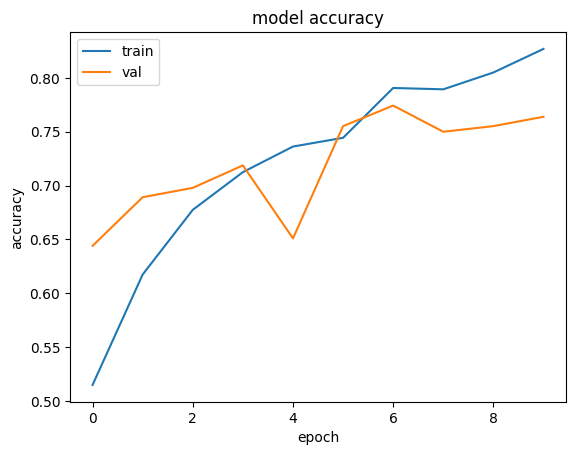

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

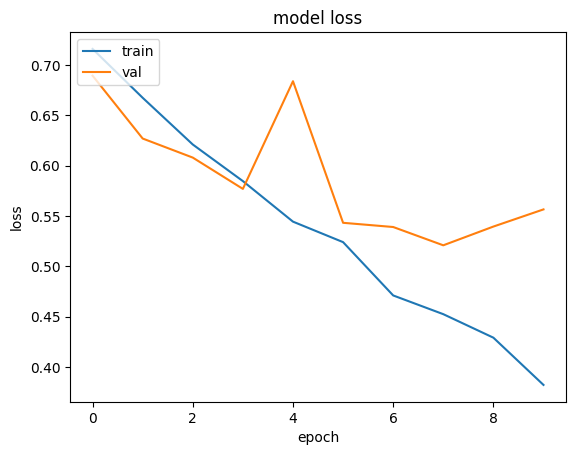

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2: Data Augmentation

In [50]:
data_gen_aug = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,

                                  brightness_range=[0.7,1.3],
                                  zoom_range=[0.8,1.2]
                                  )

train_generator_aug = data_gen_aug.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

history_aug = make_convnet(train_gen=train_generator_aug, validation_gen=validation_generator, pat=2)


Found 1600 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 21s 393ms/step - loss: 0.7143 - accuracy: 0.5581 - val_loss: 0.6790 - val_accuracy: 0.5365
Epoch 2/10
50/50 [==============================] - 19s 384ms/step - loss: 0.6877 - accuracy: 0.5300 - val_loss: 0.6835 - val_accuracy: 0.5938
Epoch 3/10
50/50 [==============================] - 23s 468ms/step - loss: 0.6866 - accuracy: 0.5244 - val_loss: 0.6724 - val_accuracy: 0.5365
Epoch 4/10
50/50 [==============================] - 22s 435ms/step - loss: 0.6775 - accuracy: 0.5788 - val_loss: 0.6479 - val_accuracy: 0.6198
Epoch 5/10
50/50 [==============================] - 21s 424ms/step - loss: 0.6290 - accuracy: 0.6419 - val_loss: 0.6403 - val_accuracy: 0.6302
Epoch 6/10
50/50 [==============================] - 21s 413ms/step - loss: 0.6331 - accuracy: 0.6556 - val_loss: 0.6366 - val_accuracy: 0.5955
Epoch 7/10
50/50 [==============================] - 18s 365ms/step - loss: 0.5998 - accuracy: 0.6862

### Plot Accuracy

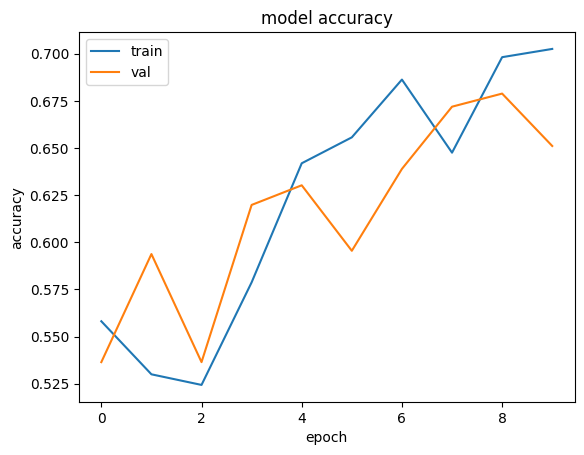

In [51]:
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

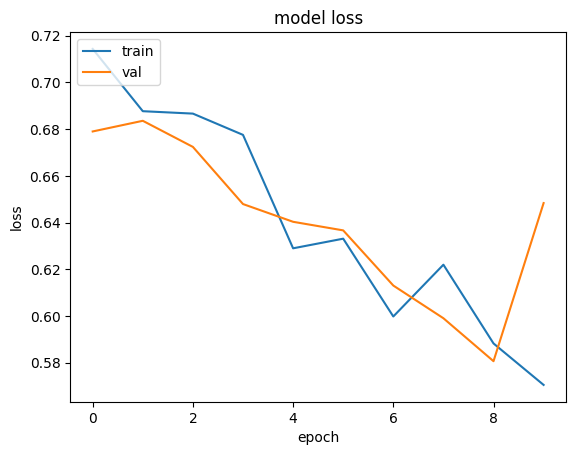

In [52]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Interlude: Applying a pre-trained convolutional neural network

In [53]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

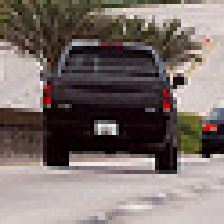

In [54]:
img = load_img("a5_images/train/car/0000.jpg", target_size=(224,224))
img

In [55]:

img = load_img("a5_images/train/car/0000.jpg", target_size=(224,224))
arr = img_to_array(img)
arr = preprocess_input(arr)

arr = arr.reshape(1, 224, 224, 3)

pred = vggmodel.predict(arr)
decode_predictions(pred)

1/1 [==============================] - 0s 197ms/step


[[('n03417042', 'garbage_truck', 0.15934166),
  ('n03345487', 'fire_engine', 0.111557655),
  ('n04252225', 'snowplow', 0.100916766),
  ('n06874185', 'traffic_light', 0.08726416),
  ('n03977966', 'police_van', 0.086844906)]]

## Part 3: Using VGG-16 as an image extractor

In [56]:
import numpy as np

def create_vgg16_features(dir):
    feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
    
    vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

    train_generator = vgg_data_gen.flow_from_directory(
        dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    cnn_features = feature_extractor.predict(train_generator)

    with open(dir + "_features",'wb') as f:
        np.save(f,cnn_features)

In [57]:
create_vgg16_features("a5_images/train")
create_vgg16_features("a5_images/validation")

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 24s 472ms/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 8s 468ms/step


Below is our model code, it is a fairly simple neural network that still outperforms the previous network.

In [58]:
def train_on_cnnfeatures(train_file, val_file):
    
    with open(train_file,'rb') as tf:
        X_train = np.load(tf)
        y_train = get_labels(len(X_train))

        with open(val_file,'rb') as vf:
            X_val = np.load(vf)
            y_val = get_labels(len(X_val))

            num_classes = 2
            model = Sequential()
            model.add(Flatten())
            model.add(Dense(512, activation='relu'))
            model.add(Dense(num_classes - 1, activation='sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)


            history = model.fit(x = X_train,
                                y = y_train,
                                batch_size=16,
                                epochs=10,
                                verbose=1,
                                validation_data=(X_val, y_val),
                                callbacks=[es]);
            return history

def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [59]:
history_vgg = train_on_cnnfeatures("a5_images/train_features","a5_images/validation_features")

Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 3.5855 - accuracy: 0.8600 - val_loss: 0.8716 - val_accuracy: 0.8872
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 0.1901 - accuracy: 0.9575 - val_loss: 0.7001 - val_accuracy: 0.9028
Epoch 3/10
100/100 [==============================] - 1s 7ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.8016 - val_accuracy: 0.8993
Epoch 4/10
100/100 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7317 - val_accuracy: 0.8993
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 2.7630e-04 - accuracy: 1.0000 - val_loss: 0.7391 - val_accuracy: 0.8993
Epoch 5: early stopping


### Plot Accuracy


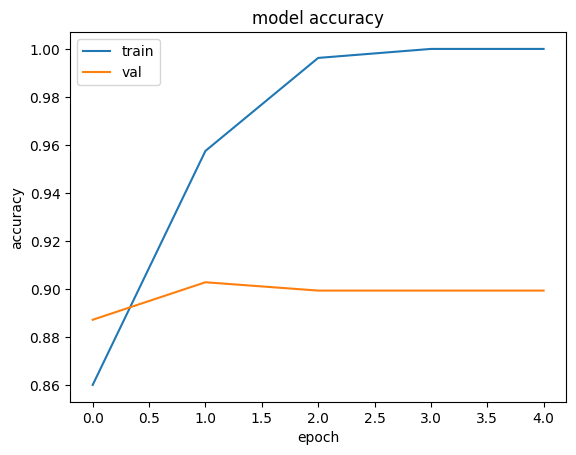

In [60]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

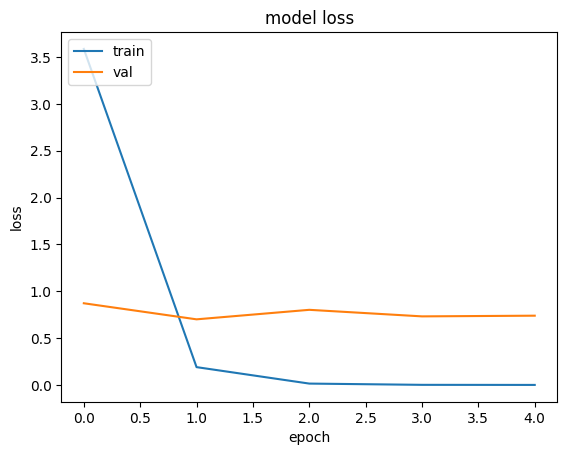

In [61]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 4: Visualizing the learned features

In [62]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [63]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

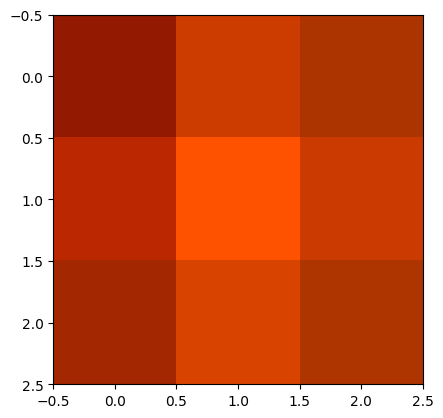

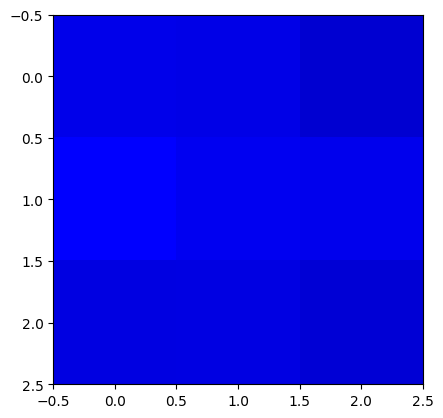

In [64]:
img_pos = kernel_image(first_layer_weights,1,positive=True)
img_neg = kernel_image(first_layer_weights,1,positive=False)
plt.imshow(img_pos)
plt.show()
plt.imshow(img_neg)